In [1]:
import pandas as pd
from prophet import Prophet

In [2]:
df = pd.read_csv('example_wp_log_peyton_manning.csv')
df.head()

ds         y
0  2007-12-10  9.590761
1  2007-12-11  8.519590
2  2007-12-12  8.183677
3  2007-12-13  8.072467
4  2007-12-14  7.893572

<AxesSubplot:xlabel='ds'>

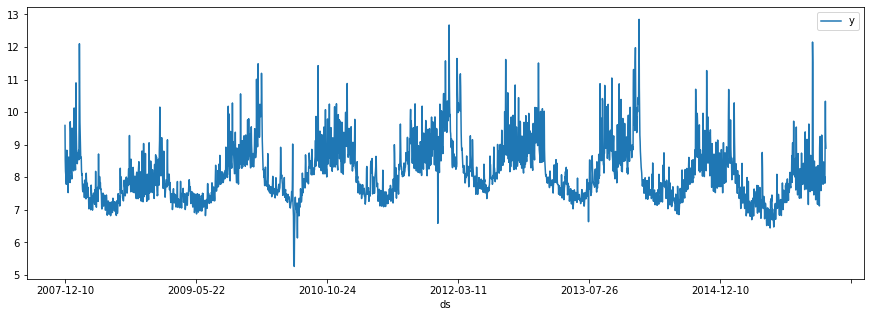

In [3]:
df.plot(x="ds",y="y", figsize=(15,5))

In [4]:
df['ds']=pd.to_datetime(df['ds'])

validate weekly seasonality:

<AxesSubplot:xlabel='ds'>

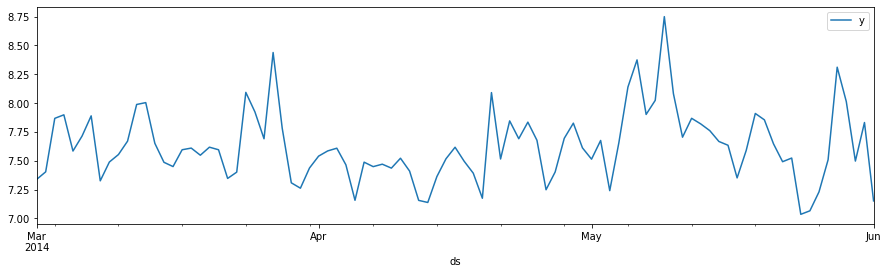

In [5]:
df[(df['ds'] >= "2014-03-01") & (df['ds'] <= "2014-06-01")].plot(x='ds',y='y',figsize=(15,4))

In [6]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
df.describe()

y
count  2905.000000
mean      8.138958
std       0.845957
min       5.262690
25%       7.514800
50%       7.997999
75%       8.580168
max      12.846747

In [8]:
df.tail()

ds          y
2900 2016-01-16   7.817223
2901 2016-01-17   9.273878
2902 2016-01-18  10.333775
2903 2016-01-19   9.125871
2904 2016-01-20   8.891374

Predictions are made on a dataframe with a column ds containing the dates for which a prediction is to be made. we can get a suitable dataframe that extends into the future a specified number of days using the helper method Prophet.make_future_dataframe. By default it will also include the dates from the history, so we will see the model fit as well.

In [18]:
future = m.make_future_dataframe(periods=365)
future.tail()

ds
3265 2017-01-15
3266 2017-01-16
3267 2017-01-17
3268 2017-01-18
3269 2017-01-19

In [19]:
future.head()

ds
0 2007-12-10
1 2007-12-11
2 2007-12-12
3 2007-12-13
4 2007-12-14

The predict method will assign each row in future a predicted value which it names yhat. If we pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [20]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
3265 2017-01-15  8.208630    7.482735    8.915444
3266 2017-01-16  8.533648    7.784549    9.202306
3267 2017-01-17  8.321065    7.619597    9.051976
3268 2017-01-18  8.153693    7.379336    8.896857
3269 2017-01-19  8.165630    7.418819    8.849431

In [21]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

Note that by change the freq in make_future_dataframe() we can get new timestamps with different frequency of the historical data:

In [11]:
future2 = m.make_future_dataframe(periods=3,freq='min')
future2.tail()

ds
2903 2016-01-19 00:00:00
2904 2016-01-20 00:00:00
2905 2016-01-20 00:01:00
2906 2016-01-20 00:02:00
2907 2016-01-20 00:03:00

and it seems that Prophet.predict doesn't care about thos different frequencies:

In [12]:
m.predict(future2)

ds     trend  yhat_lower  yhat_upper  trend_lower  \
0    2007-12-10 00:00:00  8.039129    8.251343    9.470098     8.039129   
1    2007-12-11 00:00:00  8.037591    7.956458    9.184220     8.037591   
2    2007-12-12 00:00:00  8.036053    7.793760    8.989956     8.036053   
3    2007-12-13 00:00:00  8.034515    7.753463    9.002353     8.034515   
4    2007-12-14 00:00:00  8.032977    7.707264    8.964557     8.032977   
...                  ...       ...         ...         ...          ...   
2903 2016-01-19 00:00:00  7.561155    8.060710    9.345649     7.561155   
2904 2016-01-20 00:00:00  7.560131    7.954660    9.246394     7.560131   
2905 2016-01-20 00:01:00  7.560130    7.956389    9.193933     7.560130   
2906 2016-01-20 00:02:00  7.560130    7.969712    9.157049     7.560130   
2907 2016-01-20 00:03:00  7.560129    7.915419    9.196295     7.560129   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0        8.039129        0.802972              0.802972              0.802972   
1        8.037591        0.553064              0.553064              0.553064   
2        8.036053        0.350448              0.350448              0.350448   
3        8.034515        0.329912              0.329912              0.329912   
4        8.032977        0.319447              0.319447              0.319447   
...           ...             ...                   ...                   ...   
2903     7.561155        1.157254              1.157254              1.157254   
2904     7.560131        0.989124              0.989124              0.989124   
2905     7.560130        0.989051              0.989051              0.989051   
2906     7.560130        0.988979              0.988979              0.988979   
2907     7.560129        0.988906              0.988906              0.988906   

        weekly  weekly_lower  weekly_upper    yearly  yearly_lower  \
0     0.352288      0.352288      0.352288  0.450684      0.450684   
1     0.119634      0.119634      0.119634  0.433430      0.433430   
2    -0.066664     -0.066664     -0.066664  0.417112      0.417112   
3    -0.072261     -0.072261     -0.072261  0.402172      0.402172   
4    -0.069571     -0.069571     -0.069571  0.389018      0.389018   
...        ...           ...           ...       ...           ...   
2903  0.119634      0.119634      0.119634  1.037621      1.037621   
2904 -0.066664     -0.066664     -0.066664  1.055788      1.055788   
2905 -0.066749     -0.066749     -0.066749  1.055800      1.055800   
2906 -0.066833     -0.066833     -0.066833  1.055812      1.055812   
2907 -0.066918     -0.066918     -0.066918  1.055824      1.055824   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0         0.450684                   0.0                         0.0   
1         0.433430                   0.0                         0.0   
2         0.417112                   0.0                         0.0   
3         0.402172                   0.0                         0.0   
4         0.389018                   0.0                         0.0   
...            ...                   ...                         ...   
2903      1.037621                   0.0                         0.0   
2904      1.055788                   0.0                         0.0   
2905      1.055800                   0.0                         0.0   
2906      1.055812                   0.0                         0.0   
2907      1.055824                   0.0                         0.0   

      multiplicative_terms_upper      yhat  
0                            0.0  8.842101  
1                            0.0  8.590655  
2                            0.0  8.386500  
3                            0.0  8.364426  
4                            0.0  8.352424  
...                          ...       ...  
2903                         0.0  8.718409  
2904                         0.0  8.549255  
2905                         0.0  8.5

make_future_dataframe() can be called only on fitted model:

In [13]:
m2 = Prophet()
future3 = m2.make_future_dataframe(periods=3)
future3

Exception: Model has not been fit.

Plot the forecast:

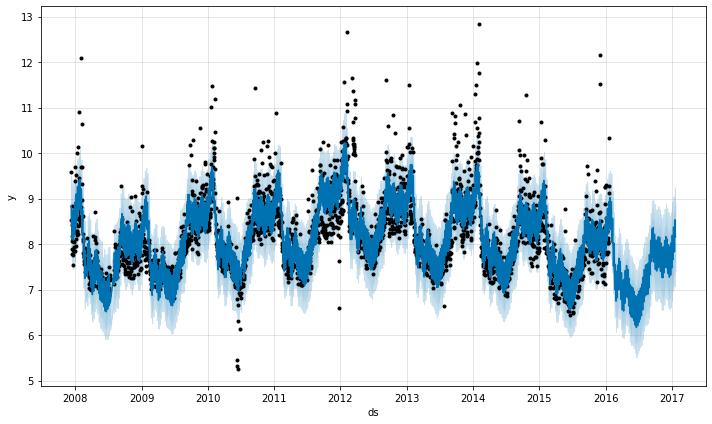

In [14]:
fig1 = m.plot(forecast)

In the above figure: blue points are the actual data point, blue line is the pricted values and in light blue - the uncertainty intervals. We can also plot the components:

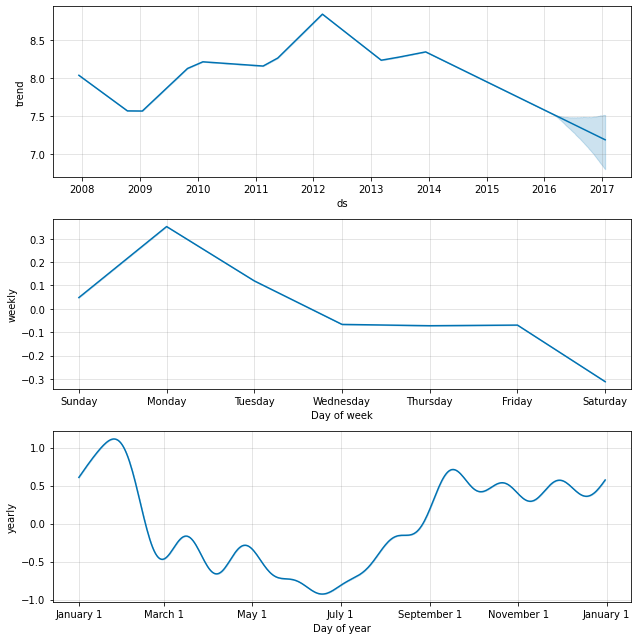

In [15]:
fig2 = m.plot_components(forecast)


Prophet has function to make interactive plots using potly:

In [24]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [25]:
plot_components_plotly(m, forecast)


we can see that there are too many data points that lie outside the 80% interval... so it is defiently not the interval that suited for anomaly detection... lets try to change it to 95:

In [29]:
m2 = Prophet(interval_width=0.95)
m2.fit(df)
future = m2.make_future_dataframe(periods=365)
forecast = m2.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


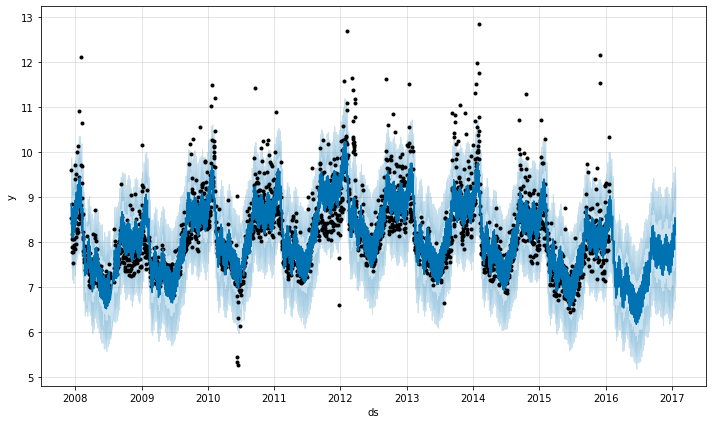

In [30]:
fig2 = m2.plot(forecast)

lets calculate how may points are outside the uncertainty intervals:


In [38]:
((forecast['yhat_lower'].values[:len(df)] > df['y'].values).sum() +
(forecast['yhat_upper'].values[:len(df)] < df['y'].values).sum()) / len(df)

0.045438898450946646

4.5% of the data lies outside the uncertainty interval (make sense due to the 95% interval width). this is still large. On the other hand since we require consecutive outliers to be considered as anomalies maybe it is good enough...

In [39]:
plot_plotly(m2, forecast)

lets try with 99% interval:

In [40]:
m3 = Prophet(interval_width=0.99)
m3.fit(df)
future = m3.make_future_dataframe(periods=365)
forecast = m3.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [41]:
((forecast['yhat_lower'].values[:len(df)] > df['y'].values).sum() +
(forecast['yhat_upper'].values[:len(df)] < df['y'].values).sum()) / len(df)

0.02857142857142857

In [42]:
(forecast['yhat_upper'].values[:len(df)] < df['y'].values).sum()

76

In [43]:
(forecast['yhat_lower'].values[:len(df)] > df['y'].values).sum()

7

In [44]:
plot_plotly(m3, forecast)

!!!! IMPORTANT TODO!!! remove outliers before fit, otherwise the uncertainty boundries are too wide. see [here](https://facebook.github.io/prophet/docs/outliers.html). outliers can be reomved with IQR (or any other reasonable method in feature_engine package) - the rationale is that we want prediction of <b>normal</b> beheviour.